# Restaurant Revenue Prediction

### Table of Contents:
1. Importing Libraries
2. Importing Dataset
3. Peek Into Data
4. Converting string values to int
5. Splitting data into train and test data
6. Importing the model
7. Evaluate the performace using R2 and RMSE errors
8. Visualize the model

#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### 2. Importing Dataset

In [2]:
# data was imported from : https://umkc.box.com/s/ac6vql1s466ss2b99ifetvh9g1yuj1uj
df = pd.read_csv('revenue.csv')
df.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715


#### 3. Sneak Peak of Data
###### a. df.isnull().sum() -- gives the null values of every column

In [3]:
df.isnull().sum()

Id            0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

###### b. df.describe() -- gives the complete information about data

In [4]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


#### 4. Converting string to int

In [5]:
convert = {"City Group": {"Big Cities": 0, "Other": 1}, "Type" : {"FC" : 0, "IL" : 1, "DT" : 2}}
data = df.replace(convert)
data.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,0,1,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,0,0,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,1,1,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,1,1,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,1,1,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715


In [6]:
#checking the data types
data.dtypes

Id              int64
City Group      int64
Type            int64
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue         int64
dtype: object

#### 5. Splitting the data into train and test data.

In [7]:
y = np.log(data.revenue)
x = data.drop(['revenue', 'Id'], axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=.33)

#### 6. Building the Model

In [8]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

#### 7. Evaluate the performace using R2 and RMSE errors

In [9]:
##Evaluate the performance using R2 and RMSE Erros
print ("R squared error : \n", model.score(x_test, y_test))
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print ('RMSE error : \n', mean_squared_error(y_test, predictions))

R squared error : 
 -0.6683851581663722
RMSE error : 
 0.4574321656698906


#### Our model got R^2 error = -0.66 and RMSE error = 0.457

#### 8. Visualize the model

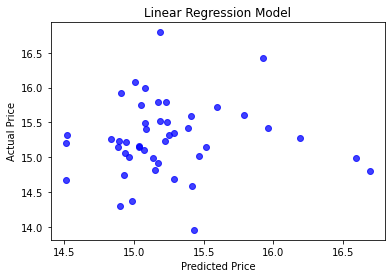

In [10]:
plt.scatter(predictions, y_test, alpha=.75,color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()